In [27]:
from sklearn import datasets, ensemble, metrics
import numpy as np

# loading data
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X[:3])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]


In [28]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
# splitting
X_train, X_test = np.split(X, [int(0.75 * X.shape[0]) + 1])
y_train, y_test = np.split(y, [int(0.75 * X.shape[0]) + 1])

### Task: Implement k-NN, compare quality with random forest classifier on 1000 trees.

In [29]:
# implementation of 1NN with Euclidean metric for classification

def euc(x, y):
    return np.sqrt(np.sum((x - y)**2)) # Euclidean metric


y_pred = []

for test_value in X_test:
    min_metric_ind = 0
    min_metric = euc(test_value, X_train[0])
    
    for index, train_value in enumerate(X_train):
        metric = euc(test_value, train_value)
        
        if metric < min_metric:
            min_metric = metric
            min_metric_ind = index
            
    y_pred.append(y_train[min_metric_ind])
    
# accuracy
knn_error = 1 - metrics.accuracy_score(y_test, y_pred)
print('Error:', knn_error)

Error: 0.03786191536748329


In [32]:
print(y_pred)

[7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 9, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5, 6, 7, 1, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 5, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 7, 8, 4, 6, 6, 6, 9, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 9, 6, 3, 1, 9, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 3, 5, 9, 4, 5, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 

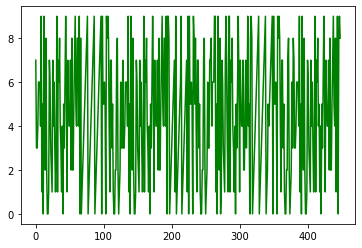

In [39]:
from matplotlib import pyplot as plt

plt.plot(y_pred, color='green')
plt.show()

In [15]:
# creating and fitting random forest

rf_classifier = ensemble.RandomForestClassifier(n_estimators = 1000)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_test.shape[0]

449

In [21]:
pred = rf_classifier.predict(X_test)

rf_error = float((y_test != pred).sum())/y_test.shape[0]
print('Error:', rf_error)

Error: 0.060133630289532294
